<a href="https://colab.research.google.com/github/Ppangchon/project/blob/main/Trainlastoct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Library

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import PIL
import plotly
import pandas as pd
import os,cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Conv2D, AveragePooling2D, Flatten, Dropout, MaxPool2D)
import time
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json
import requests
from IPython.display import Image
from io import BytesIO  
import pickle as p 
import plotly.graph_objs as go  
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import backend as K
K.image_data_format()
from keras.utils import np_utils

# 2. ข้อมูล

In [2]:
from google.colab import drive # เชื่อม drive ของเรา Mounted at /content/drive เชื่อมสำเร็จ
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os # os จัดการเกี่ยวกับไฟล์ต่างๆ ในโฟล์เดอร์
path = '/content/drive/My Drive/lastoct'  # data เราอยู่โฟล์เดอร์ไหน

In [4]:
train_dir ="/content/drive/My Drive/lastoct/train"   # สำหรับ Train
test_dir ="/content/drive/My Drive/lastoct/test"     # สำหรับ Validation
val_dir ="/content/drive/My Drive/lastoct/validation"       # สำหรับ Test

target_img_shape = (256, 256)           #  ขนาดภาพ input เข้าสู่ Model (W x H)

In [5]:
# กำหนดให้ Normalize pixel
train_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory(train_dir, target_size=target_img_shape, batch_size=10, class_mode='categorical')

Found 17779 images belonging to 4 classes.


In [6]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory(val_dir, target_size=target_img_shape, batch_size=10, class_mode='categorical')   

Found 2217 images belonging to 4 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(test_dir, target_size=target_img_shape, batch_size=10, class_mode='categorical')   

Found 2182 images belonging to 4 classes.


จัดรูปแบบโครงสร้าง

# Visualization
  สรุปข้อมูลแต่ละคลาสมีจำนวนภาพเท่าใด

In [8]:
print('Train')
ids, counts = np.unique(train_set.classes, return_counts=True)
print(ids)        # คลาส
print(counts)     # จำนวนภาพของคลาส

Train
[0 1 2 3]
[4552 4469 4385 4373]


In [9]:
print('Validation')
ids, counts = np.unique(val_set.classes, return_counts=True)
print(ids)        # คลาส
print(counts)     # จำนวนข้อมูลของคลาส

Validation
[0 1 2 3]
[528 546 540 603]


In [10]:
print('Test')
ids, counts = np.unique(test_set.classes, return_counts=True)
print(ids)        # คลาส
print(counts)     # จำนวนข้อมูลของคลาส

Test
[0 1 2 3]
[552 570 528 532]


In [11]:
train_set[0][0][0].shape

(256, 256, 3)

In [12]:
labels = (train_set.class_indices)
print(labels)

{'CSC': 0, 'Normal': 1, 'PCV': 2, 'VKH': 3}


In [13]:
num_classes = 4

## คำนวณสัดส่วน

In [14]:
#_ , train_count = np.unique(train_set.classes, return_counts = True)
#_ , val_count = np.unique(val_set.classes, return_counts = True)

#print('Ratio Validation/Training set:',
#      val_count/(train_count + val_count) * 100)

## ดูตัวอย่างคลาส และ Visualize ภาพ

{'CSC': 0, 'Normal': 1, 'PCV': 2, 'VKH': 3}
(10, 256, 256, 3)
(10, 4)
class: [0. 0. 0. 1.]


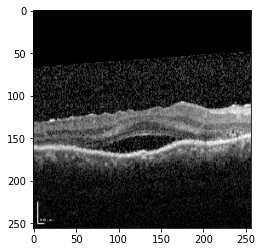

In [15]:
print(train_set.class_indices)

for image_batch, labels_batch in train_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  plt.imshow(image_batch[0])
  print('class:', labels_batch[0])
  break

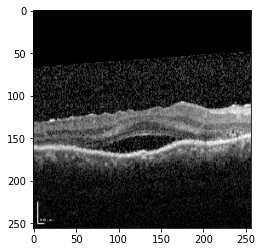

In [16]:
# หรือจะแสดงภาพด้วยโค้ดนี้
plt.imshow(train_set[0][0][0])
plt.show()

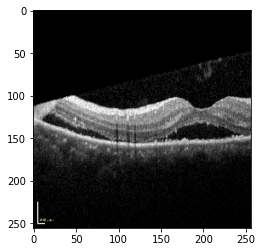

In [17]:
# ตรวจดูภาพใน Validation set
plt.imshow(val_set[0][0][0])
plt.show()

# สร้าง Model

In [18]:
# ขนาดภาพอินพุตเข้าสู่ Model
in_shape = (256,256,3)
in_shape

(256, 256, 3)

In [19]:
model = Sequential()   # สร้าง Model

# สร้างชั้น Convolution ชั้นแรก ค่าพารามิเตอร์ activation ใช้ ReLU
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = in_shape))
model.add(MaxPool2D((2,2)))    # สร้างชั้น Max Pooling ค่าพารามิเตอร์ 2,2 คือ Pool Size

# ชั้นที่ 2
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))

# ชั้นที่ 3 
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

# ชั้นที่ 4 (Convolution + Max Pooling)
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

# สร้างชั้น Neural Network 
model.add(Flatten())
model.add(Dense(4, activation='softmax'))
model.summary()          # ดูสรุปโครงสร้าง Model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

## Complie และ Train

In [20]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [21]:
start = time.time()

history = model.fit(train_set, steps_per_epoch=len(train_set), 
                    validation_data=val_set, 
                    epochs=10,verbose=1)

end = time.time()
print("Time Taken: {:.2f} minutes".format((end-start)/60))

Epoch 1/10
1778/1778 [==============================] - 9941s 6s/step - loss: 0.9268 - accuracy: 0.5964 - val_loss: 1.1833 - val_accuracy: 0.6333
Epoch 2/10
1778/1778 [==============================] - 179s 101ms/step - loss: 0.3448 - accuracy: 0.8723 - val_loss: 1.1274 - val_accuracy: 0.6455
Epoch 3/10
1778/1778 [==============================] - 179s 100ms/step - loss: 0.2013 - accuracy: 0.9288 - val_loss: 1.1790 - val_accuracy: 0.6870
Epoch 4/10
1778/1778 [==============================] - 179s 100ms/step - loss: 0.1361 - accuracy: 0.9524 - val_loss: 1.2867 - val_accuracy: 0.6852
Epoch 5/10
1778/1778 [==============================] - 179s 101ms/step - loss: 0.1011 - accuracy: 0.9659 - val_loss: 1.9546 - val_accuracy: 0.6455
Epoch 6/10
1778/1778 [==============================] - 179s 101ms/step - loss: 0.0791 - accuracy: 0.9731 - val_loss: 1.6964 - val_accuracy: 0.6888
Epoch 7/10
1778/1778 [==============================] - 179s 101ms/step - loss: 0.0661 - accuracy: 0.9772 - val_lo

In [22]:
# Evaluate the model
#loss, acc = model.evaluate(test_set)
#print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

## ประเมิน

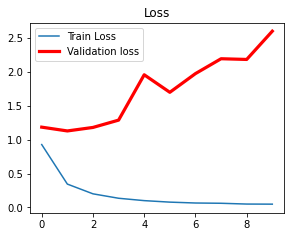

In [28]:
plt.figure(figsize = (10, 3.5))
plt.subplot(1, 2 , 1)
plt.title('Loss')
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], 'r', lw = 3.2, label = 'Validation loss')
plt.legend()

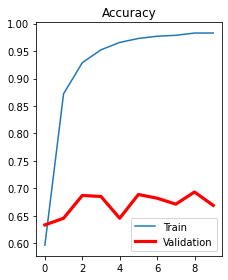

In [29]:
plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], 'r', lw = 3.2, label = 'Validation')
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
acc = model.evaluate(val_set, steps = len(val_set), verbose = 0)
print('Accuracy = {:.3f}' .format(acc[1]*100))

# ประเมิน Modelได้ 35% ต้องเพิ่มจำนวนภาพในการ train และเพิ่ม epoch

Accuracy = 66.892


## ทดสอบและใช้งาน Model Predict ภาพ 


In [93]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing import image 
import keras.utils as image

In [94]:
target_img_shape = (256,256,3)
test_image = image.load_img('/content/drive/My Drive/lastoct/test/CSC/FQ8979 23-03-12 RE_000_cropped.png', target_size = target_img_shape)   

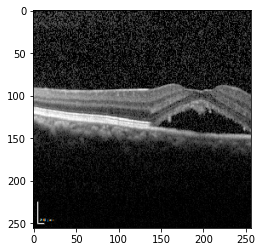

In [95]:
test_image = image.img_to_array(test_image)   # เปลี่ยนเป็น array
test_image /= 255

plt.imshow(test_image)     # แสดงภาพ
plt.show()

In [96]:
test_image = np.expand_dims(test_image, axis=0)
test_image.shape

(1, 256, 256, 3)

In [97]:
result = model.predict(test_image)
result

1/1 [==============================] - 0s 34ms/step


array([[9.9999487e-01, 3.6280508e-14, 5.1292609e-06, 4.2196585e-13]],
      dtype=float32)

In [114]:
train_set.class_indices

{'CSC': 0, 'Normal': 1, 'PCV': 2, 'VKH': 3}

## kaggle

In [99]:
main_dir = os.listdir(path)
print(main_dir)

for i in main_dir:
    data_dir_list =  os.listdir('/content/drive/My Drive/lastoct/' + str(i) )
    print(i, data_dir_list)

['train', 'test', 'validation']
train ['CSC', 'Normal', 'PCV', 'VKH']
test ['PCV', 'VKH', 'Normal', 'CSC']
validation ['CSC', 'PCV', 'VKH', 'Normal']


In [100]:
no_images = 0
for i in main_dir:
    data_dir_list =  os.listdir('/content/drive/My Drive/lastoct/'+ str(i) )
    print(i, data_dir_list)
    for dataset in data_dir_list:
        img_list = os.listdir( '/content/drive/My Drive/lastoct/'+str(i)+ '/' + dataset)
        no_images = no_images+len(img_list)
print(no_images)

train ['CSC', 'Normal', 'PCV', 'VKH']
test ['PCV', 'VKH', 'Normal', 'CSC']
validation ['CSC', 'PCV', 'VKH', 'Normal']
22178


In [101]:
labels = np.ones((no_images,),dtype='int64')
label_index=0

In [102]:
img_data_list=[]
img=0

for i in main_dir:
    data_dir_list =  os.listdir('/content/drive/My Drive/lastoct/'+ str(i) )
    print(i, data_dir_list)
    
    for dataset in data_dir_list:
        img_list = os.listdir( '/content/drive/My Drive/lastoct/'+str(i)+ '/' + dataset)
        print ('Loading the images of dataset-'+'{}\n'.format(dataset))
        
        for img in img_list:
            input_img=cv2.imread('/content/drive/My Drive/lastoct/' + str(i)+ '/'+ dataset + '/'+ img)
            
            input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img_resize=cv2.resize(input_img,(256,256,))
            
            img_data_list.append(input_img_resize)
            
            if dataset==  'CSC':
                labels[label_index]=  0
                
            if dataset == 'Normal':
                labels[label_index] = 1
                
            if dataset == 'PCV':
                labels[label_index] = 2
                
            if dataset == 'VKH':
                labels[label_index] = 3
                
            label_index = label_index+1

train ['CSC', 'Normal', 'PCV', 'VKH']
Loading the images of dataset-CSC

Loading the images of dataset-Normal

Loading the images of dataset-PCV

Loading the images of dataset-VKH

test ['PCV', 'VKH', 'Normal', 'CSC']
Loading the images of dataset-PCV

Loading the images of dataset-VKH

Loading the images of dataset-Normal

Loading the images of dataset-CSC

validation ['CSC', 'PCV', 'VKH', 'Normal']
Loading the images of dataset-CSC

Loading the images of dataset-PCV

Loading the images of dataset-VKH

Loading the images of dataset-Normal



In [103]:
import gc
len(img_data_list)

22178

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


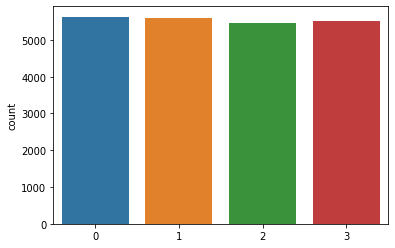

In [104]:
sns.countplot(labels);
plt.show()

In [105]:
img_data_list = np.array(img_data_list)
img_data_list = img_data_list.astype('float32')
img_data_list /= 255
print (img_data_list.shape)

(22178, 256, 256)


In [106]:
# Define the number of classes
num_classes = 4

names = ['CSC','Normal','PCV', 'VKH']

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

In [107]:
# Split the dataset with 10% testing data
X_train, X_test, y_train, y_test = train_test_split(img_data_list, Y ,test_size=0.10) #, random_state = 2

In [113]:
# Evaluate the model w.r.t Test Loss and Test Accuracy
score = model.evaluate(X_test, y_test)
print('Test Loss:', score[0])

print('Test accuracy:', score[1])

InvalidArgumentError: ignored

In [55]:
import glob

mylist = [f for f in glob.glob('./test_set*')]
imf_lst, y_pred_cls, y_pred = predict_CSC_NORMAL_PCV_VKH(mylist)

mylist
for i in mylist:
  print(os.path.basename(i), end=' | ')

NameError: ignored

## Confusion Matrix